# Obtention d'une AFD en utilisant l'ACP
Ce notebook est une démonstration de la propriété suivante:

> L'AFD est une ACP sur les centres des classes pondérés par le nombre d'observations dans chaque classe.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

## Création du jeu de données

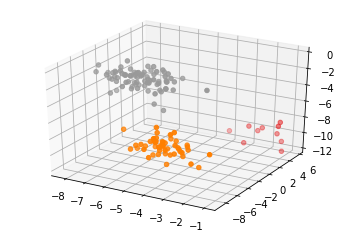

In [2]:
X, y = make_blobs(n_samples=[10, 50, 80], n_features=3, random_state=1)

ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='Set1')

## Calcul des moyennes et des effectifs des classes

In [3]:
df = pd.DataFrame(X)
df = df.rename(columns=lambda x: f'x{x}')
df = df.assign(y=y)
df.head()

,x0,x1,x2,y
0,-5.921733,-3.159658,-2.806087,2
1,-3.371423,-7.475090,-5.856362,1
2,-7.463253,-2.845174,-4.161891,2
3,-5.150570,-3.675189,-0.604653,2
4,-7.191730,-2.134769,-2.416027,2


In [4]:
means = df.groupby(by='y').mean().sort_index().values
counts = df.y.value_counts().sort_index().values

## Construction de la matrice des moyennes

In [5]:
repeats = [np.tile(mu, (cnt,1)) for (mu, cnt) in zip(means, counts)]
M = np.vstack(repeats)

## Obtention de la projection

In [6]:
pca = PCA(n_components=2).fit(M)
lda = pca.transform(X)

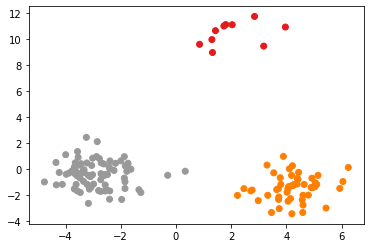

In [7]:
plt.scatter(lda[:,0], lda[:,1], c=y, cmap='Set1')